In [1]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import img_as_float
import matplotlib.pyplot as plt
import numpy as np


/home/jonasbaa/Pictures/OneDrive/UiO/Masters degree/Semester 1/MAT4110 Innføring i numerisk analyse/venv/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


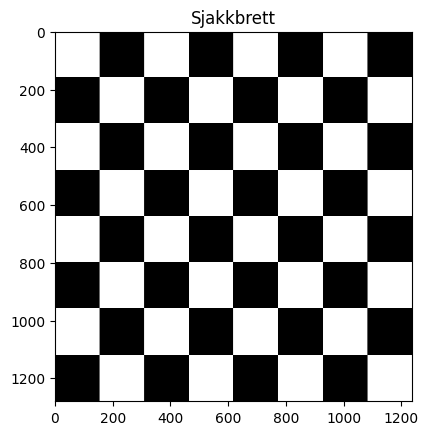

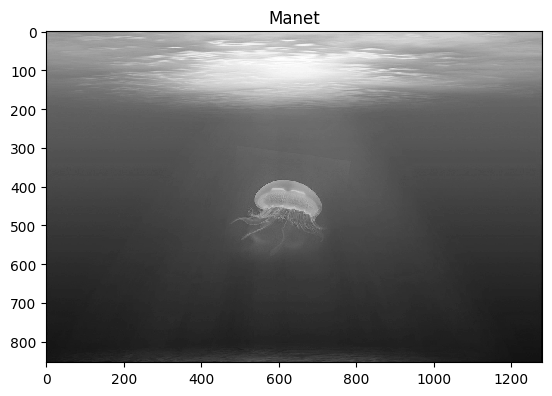

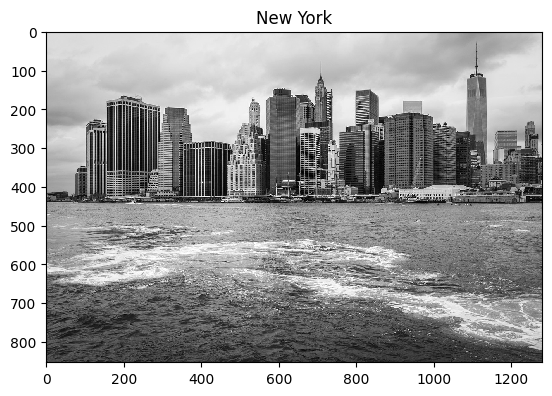

In [2]:
# Read and convert images to grayscale
im1 = rgb2gray(imread('images/chessboard.png'))
im2 = rgb2gray(imread('images/jellyfish.jpg'))
im3 = rgb2gray(imread('images/outdoors.jpg'))

# Convert to double (float values between 0 and 1)
im1 = img_as_float(im1)
im2 = img_as_float(im2)
im3 = img_as_float(im3)

# Plot the images
plt.figure()
plt.imshow(im1, cmap='gray', interpolation='none')
plt.title("Sjakkbrett")
plt.show()

plt.figure()
plt.imshow(im2, cmap='gray', interpolation='none')
plt.title("Manet")
plt.show()

plt.figure()
plt.imshow(im3, cmap='gray', interpolation='none')
plt.title("New York")
plt.show()

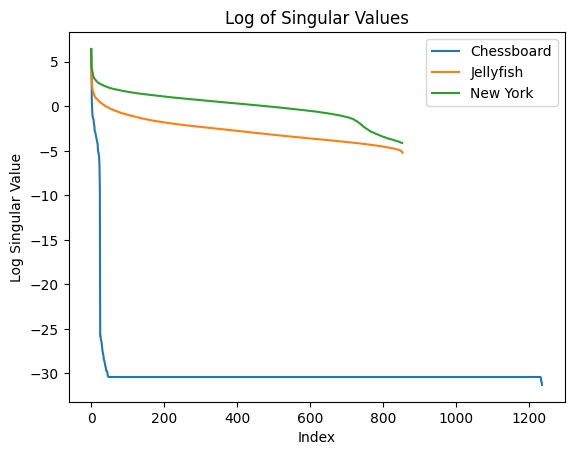

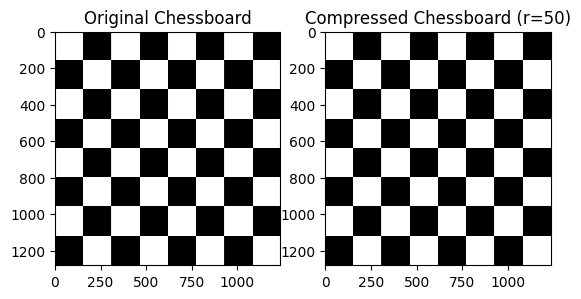

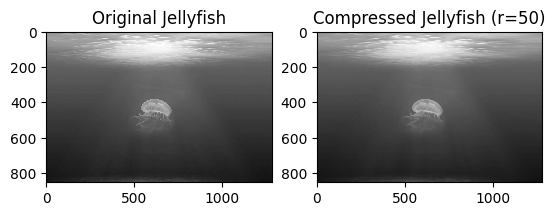

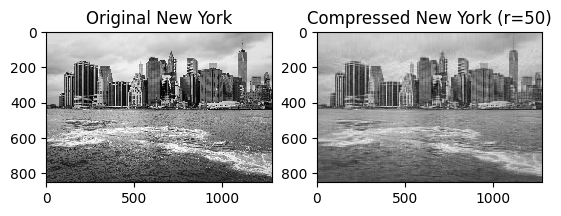

In [3]:
# Function to perform SVD and rank-r approximation
def svd_compress(image, r):
    # Perform SVD
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    
    # Retain only the first r singular values
    Ur = U[:, :r]
    Sr = np.diag(S[:r])
    Vtr = Vt[:r, :]
    
    # Reconstruct the compressed image
    compressed_image = np.dot(Ur, np.dot(Sr, Vtr))
    
    return compressed_image, S

# Read and convert images to grayscale
im1 = rgb2gray(imread("images/chessboard.png"))
im2 = rgb2gray(imread("images/jellyfish.jpg"))
im3 = rgb2gray(imread("images/outdoors.jpg"))

# Convert images to float between 0 and 1
im1 = img_as_float(im1)
im2 = img_as_float(im2)
im3 = img_as_float(im3)

# Set rank for the approximation
r = 50  # You can change this as desired

# Compress the images using SVD and retain the singular values
compressed_im1, S1 = svd_compress(im1, r)
compressed_im2, S2 = svd_compress(im2, r)
compressed_im3, S3 = svd_compress(im3, r)

# Plot the log of the singular values for each image
plt.figure()
plt.plot(np.log(S1), label='Chessboard')
plt.plot(np.log(S2), label='Jellyfish')
plt.plot(np.log(S3), label='New York')
plt.title("Log of Singular Values")
plt.xlabel("Index")
plt.ylabel("Log Singular Value")
plt.legend()
plt.savefig("results/singular_values.png")
plt.show()

# Function to plot the original and compressed images
def plot_images(original, compressed, title):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray', interpolation='none')
    plt.title(f'Original {title}')
    
    plt.subplot(1, 2, 2)
    plt.imshow(compressed, cmap='gray', interpolation='none')
    plt.title(f'Compressed {title} (r={r})')
    plt.savefig(f"results/{title}_compressed.png")
    plt.show()

# Plot the original and compressed images for each case
plot_images(im1, compressed_im1, 'Chessboard')
plot_images(im2, compressed_im2, 'Jellyfish')
plot_images(im3, compressed_im3, 'New York')
